In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cornell-moviedialog-corpus:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F18754%2F24465%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240306%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240306T065430Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D63749106ca6d5f0d6570df60829d007a2e1c23dc04a3060257fe831453791e6eddd2b9acaf44ff97e73088fc59897fd0d88e003d3b10315ef561d0df4a903afd22deaea335cb03fe956d4d479c00b469dbd10dee5900bcf2d33b9c2b43c76d583e9b4f11524fc8077c41d91ef9c1d736d84840eb4969181db334e2870b707a7c9ea336bcffd61c9ce83bae9227c8ff1481df6e42b63e2dd472c66a1c5cdd80544aad1273f9982f03e1493a026f67ae706d6212bac66f4735176edb43cc4202c93bd98cec776df5dcd21b0a4e052883e719b1aa5cf58d6cef12b83f727b2ca8abb11347895d184ac1b36e4f91d887e946331995fea3e038bc2fa02fb3b1b65eda'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 10043300 bytes downloaded
Downloaded and uncompressed: cornell-moviedialog-corpus
Data source import complete.


The following is from https://github.com/tensorflow/examples/blob/master/community/en/transformer_chatbot.ipynb, for the purpose of self-training only.
![Encoder&Decoder](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.svpHOVsdfKOnkua-PXtmagHaCq%26pid%3DApi&f=1)

As described in the [paper](https://arxiv.org/pdf/1706.03762.pdf). Here, the encoder maps an input sequence of symbol representations $(x_1, ..., x_N)$ to a sequence of continuous representations $\vec{z
}=(z_1, ...,z_n)$. Given $\vec{z}$, the decoder then generates an output sequence $(y_1, ..., y_m)$ of symbols one element at a time. At each step the model is auto-regressive, consuming the previously generated symblos as additional input when generating the next.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cornell-moviedialog-corpus/movie_characters_metadata.txt
/kaggle/input/cornell-moviedialog-corpus/movie_lines.txt
/kaggle/input/cornell-moviedialog-corpus/movie_conversations.txt
/kaggle/input/cornell-moviedialog-corpus/README.txt
/kaggle/input/cornell-moviedialog-corpus/chameleons.pdf
/kaggle/input/cornell-moviedialog-corpus/movie_titles_metadata.txt
/kaggle/input/cornell-moviedialog-corpus/.DS_Store
/kaggle/input/cornell-moviedialog-corpus/raw_script_urls.txt


In [3]:
import tensorflow as tf
tf.random.set_seed(1234)

import tensorflow_datasets as tfds

import re
import matplotlib.pyplot as plt

# Prepare Dataset

Cornell Movie_dialogs corpus is used in this project. In this dataset, `movie_conversations.txt` contains list of the conversation IDs and `movie_lines.txt` contains the text of associated with each conversation ID.
## Load and preprocess data
To keep this example simple and fast, the maximum number of training samples to `MAX_SAMPLES=5000` and the maximum length of the sentence to be `MAX_LENGTH=40`.

The dataset is preprocessed in the following order:
* Extract `MA_SAMPLES` conversation pairs inot list of `questions` and anwers.
* Preprocess each sentence by removing special characters in each sentence.
* Build tokenizer (map text to ID and ID to text) using TensorFlow Datasets SubwordTextEncoder.
* Tokenize each sentence and add `START_TOKEN` and `END_TOKEN` to indicate the start and end of each sentence.
* Filter out sentence that has more than `MA__LENGTH` tokens.
* Pad tokenized sentences to `MAX_LENGTH`

In [4]:
# Maximum number of samples to preprocess
MAX_SAMPLES = 50000

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    # Get rid of unnecessary space
    sentecne = re.sub(r'[" "]+', " ", sentence)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    sentence = re.sub(r"[^a-zA-Z?.,!]+", " ", sentence)
    sentence = sentence.strip()
    # adding a start and an end token to the sentence
    return sentence

def load_conversations():
    # dictionary of line id to text
    id2line = {}
    with open('/kaggle/input/cornell-moviedialog-corpus/movie_lines.txt', encoding = 'utf-8', errors = 'ignore') as file:
        lines = file.readlines()
    for line in lines:
        parts = line.replace('\n', '').split(' +++$+++ ')
        id2line[parts[0]] = parts[4]

    inputs, outputs = [], []
    with open('/kaggle/input/cornell-moviedialog-corpus/movie_conversations.txt',
                     encoding = 'utf-8', errors = 'ignore') as file:
        lines = file.readlines()
    for line in lines:
        parts = line.replace('\n', '').split(' +++$+++ ')
        # get conversation in a list of line ID
        conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]
        for i in range(len(conversation) - 1):
            inputs.append(preprocess_sentence(id2line[conversation[i]]))
            outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))
            if len(inputs) >= MAX_SAMPLES:
                return inputs, outputs
    return inputs, outputs

questions, answers = load_conversations()

In [5]:
print('Sample questioin: {}'.format(questions[20]))
print('Sample answer: {}'.format(answers[20]))

Sample questioin: i really , really , really wanna go , but i can t . not unless my sister goes .
Sample answer: i m workin on it . but she doesn t seem to be goin for him .


In [6]:
# Build tokenizer for both questions and answers
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size = 2**13)

# Define start and end token to indicate the start and end of a sentence
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# Vocabulary size plus start and end token
VOCAB_SIZE = tokenizer.vocab_size + 2

In [7]:
print('Tokenized sample question: {}'.format(tokenizer.encode(questions[20])))

Tokenized sample question: [4, 281, 3, 281, 3, 143, 395, 176, 3, 42, 4, 38, 8191, 2, 37, 873, 27, 2031, 3096, 1]


In [8]:
# Maximum sentence length
MAX_LENGTH = 40

# Tokenize, filter and pad sentences
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        # tokenize sentence
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        # check tokenized sentence max length
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    # pad tokenized sentences
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_inputs, maxlen = MAX_LENGTH, padding = 'post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_outputs, maxlen=MAX_LENGTH, padding = 'post')

    return tokenized_inputs, tokenized_outputs

questions, answers = tokenize_and_filter(questions, answers)

In [9]:
print('Vocab size: {}'.format(VOCAB_SIZE))
print('Number of samples: {}'.format(len(questions)))

Vocab size: 8333
Number of samples: 44095


## Create `tf.data.Dataset`
`tf.data.Dataset` API is used to construct our input pipline in order to utilize features like caching and prefetching to speed up with training process.

The transformer is an auto-regressive model: it makes predictions one part at a time, and uses its output so far to decide whta to do next.

During training this example uses teacher-forcing. Teacher forcing is passing the true output to the next time step regardless of what the model predicts at the current time step.

As the transformer predicts each word, self-attention allows it to look at the previous words in the input sequence to better predeict the next word.

To prevent the model from peaking at the expected output the model uses a look-ahead mask.

Target in divided into `decoder_inputs` which padded as an input to the decoder and `corpped_targets` for calculating our loss and accuracy.

In [10]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# decoder inputs use the previous target as input
# remove START_TOKEN from targets
dataset = tf.data.Dataset.from_tensor_slices(({'inputs':questions, 'dec_inputs':answers[:, :-1]},{'outputs':answers[:, 1:]}))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

# Attention
## Scaled dot product Attention

The scaled dot-product attention functin used by the transformer takes three inputs: Q (query), K (key), V (value). The equation used to calculate the attention weights is:
$$Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}})$$
As the softmax normalization is done on the `key`, its values decide the amout of importance given to the `query`.

The output represents the multiplication of the attention weights and the `value` vector. This ensures that the words we want to focus on are kept as is and the irrelevant words are flushed out.

The dot-product attention is scaled by a factor of square root of the depth. This is done because for large values of depth, the dot product grows large in magnitude pushing the softmax function where it has small gradients resulting in a very hard softmax.

For example, consider that `query` and `key` have a mean of 0 and variance of 1. Their matrix mulitplication will have a mean of 0 and variance of $d_k$. Hence, squre root of $d_k$ is used for scaling (and not any other number) because the matmul of `query` and `key` should have a mean of 0 and variance of 1, so that we get a gentler softmax.

The mask is multiplied with `-1e9` (close to negative infinity). This is done because the mask is summed with scaled matrix multiplication of `query` and `key` and is applied immediately before a softmax. The goal is to zero out these cells. and large negative inputs to softmax are near zero in the output.


In [11]:
def scaled_dot_product_attention(query, key, value, mask):
    """Calculate the attention weights."""
    matmul_qk = tf.matmul(query, key, transpose_b = True)

    # scale matmul_qk
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # add the mask to zero out padding tokens
    if mask is not None:
        logits += (mask * -1e9)

    #sofmax is normalized on the last axis (seq_len_k)
    attention_weights = tf.nn.softmax(logits, axis = -1)

    output = tf.matmul(attention_weights, value)

    return output

## Mutil-head attention
Multi-head attention consists of four parts:
* Linear layers and  split into heads.
* Scaled dot-product attention.
* Concatenation of heads.
* Final linear layer.

Each multi-head attention block gets three inputs; Q (query), K (key), V (value). These are put through linear (Dense) layers and split up into multiple heads.

The `scaled_dot_product_attention` defined above is applied to each head (broadcasted for efficiency). An appropriate mask must be used in the attention step. The attention output for each head is then concatenated (using `tf.transpose`, and `tf.reshape`) and pur through a final `Dense` layer.

Instead of one single attention head, `query`, `key` and `value` are split into multiple heads because it allows the model to jointly attend to information at different positions from different representational spaces. After the split each head hsa reduced dimensionality, so the total computation cost is the same as a single head attention with full dimentionality.

In [12]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # linear layers
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # split heads
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # scaled dot-product attention
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # concatenation of heads
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # final linear layer
    outputs = self.dense(concat_attention)

    return outputs

# Transformer

## Masking
`create_padding_mask` and `create_look_ahead` are helper functions of creating masks to mask out padded tokens. Those helper functions will be used as `tf.keras.layers.Lambda` layers.

Mask all the pad tokens (value 0) in the batch to ensure the model does not treat padding as input.

In [13]:
def create_padding_mask(x):
    # tf.math.equal returns the truth value of (x == y) element-wise
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

Look-ahead mask to mask the future tokens in a sequence. We also mask out pad tokens. i.e. To predict the third word, only the first and second word will be used.

In [14]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1- tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    # tf.maximum returns the max of x and y (i.e. x>y?x:y) element-wise
    return tf.maximum(look_ahead_mask, padding_mask)

In [15]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


## Positional encoding
Since this model doesn't contain any recurrence or convolution, positional encoding is added to give the model some information about the relative position of the words in the sentence.

The positional encoding vector is added to the embedding vector. Embedding represent a token in a d-dimensional space where tokens with similar meaning will be closer to each other. But the embeddings do not encode the relative position of words  in a sentence. So after adding the positional encoding, words will be closer to each other based on the *similarity of their meaning and their position in the sentence*, in the d-dimensionl space.

The formula for calculating the positional encoding is as follows:
$$PE_{(pos, 2i)} = sin(pos/10000^{2i/d_{model}})$$
$$PE_{(pos, 2i+1)} = cos(pos/10000^{2i/d_{model}})$$

In [16]:
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000,(2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(position = tf.range(position, dtype=tf.float32)[:, tf.newaxis], i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :], d_model = d_model)
        # apply sin to even index in the array
        sines = tf.math.sin(angle_rads[:, 1::2])
        # apply cos to odd index in the array
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # negative axis refers to axis + rank(values)-th dimension.
        pos_encoding = tf.concat([sines, cosines], axis = -1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

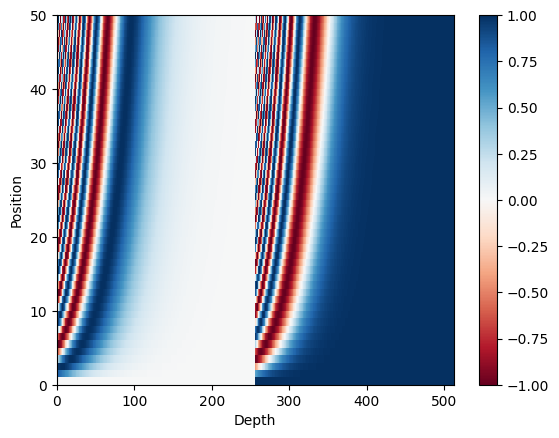

In [17]:
sample_pos_encoding = PositionalEncoding(50, 512)

# RdBu means Red-Blue, cmap --> colormap
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap = 'RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## Encoder Layer
Each encoder layer consists of sublayers:

1. Multi-head attention (with padding mask)
2. 2 dense layers followed by dropout

Each of these sublayers ahs a residual connection around it followed by a layer normalization. Residual connections help in avoiding the vanishing gradient problem in deep networks.

The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis.

In [18]:
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

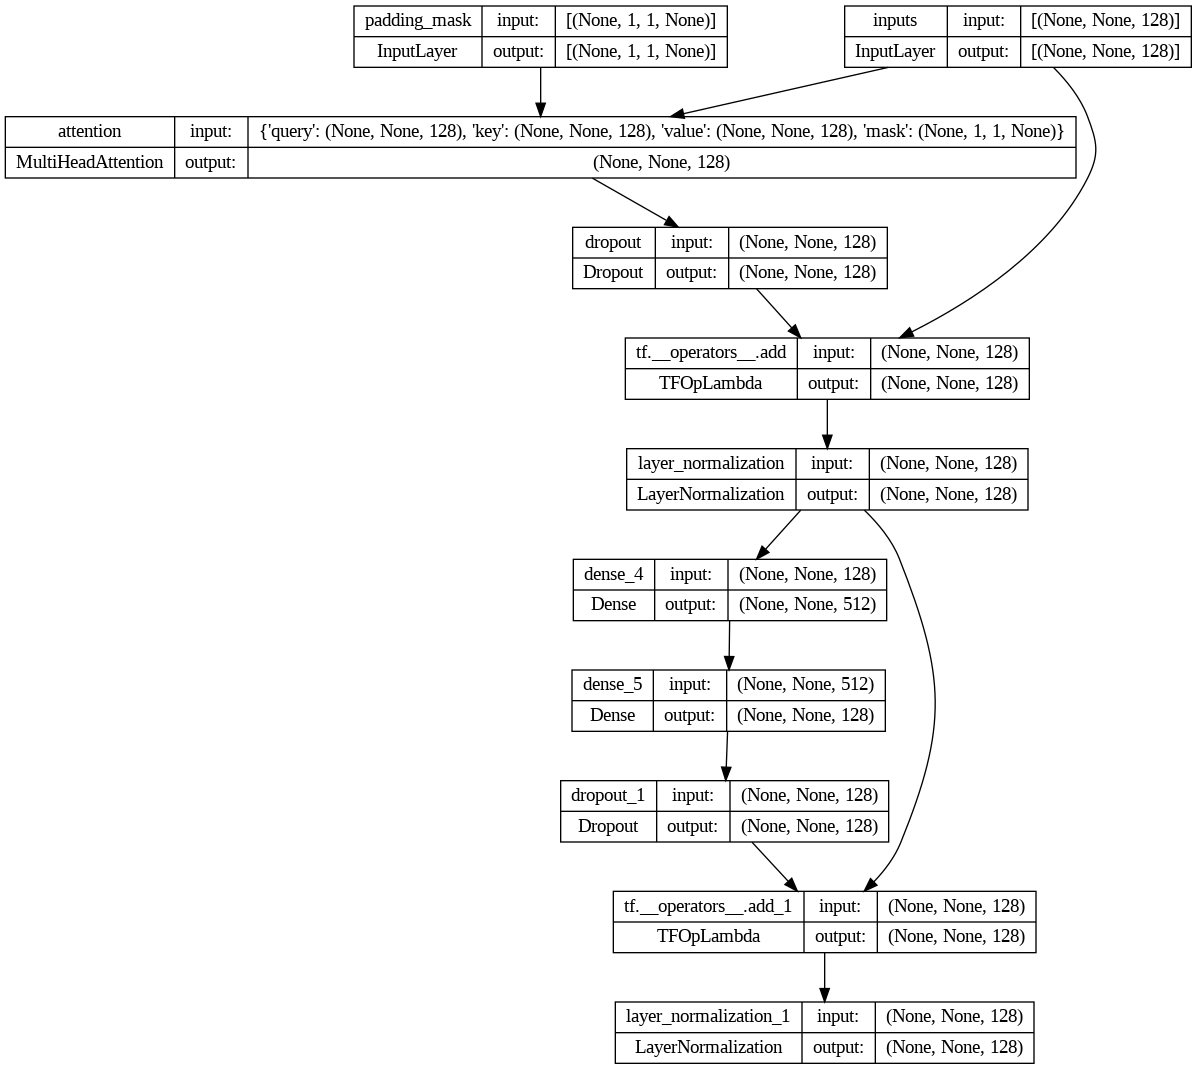

In [19]:
sample_encoder_layer = encoder_layer(
                                     units = 512,
                                     d_model = 128,
                                     num_heads = 4,
                                     dropout = 0.3,
                                     name = "encoder_layer")
tf.keras.utils.plot_model(sample_encoder_layer, to_file = 'encoder_layer.png', show_shapes = True)

## Encoder
The encoder consists of:
1. Input Embedding
2. Positional Encoding
3. `num_layers` encoder layers

The input is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the encoder layers. The output of the encoder is the input to the decoder.

In [20]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])


  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

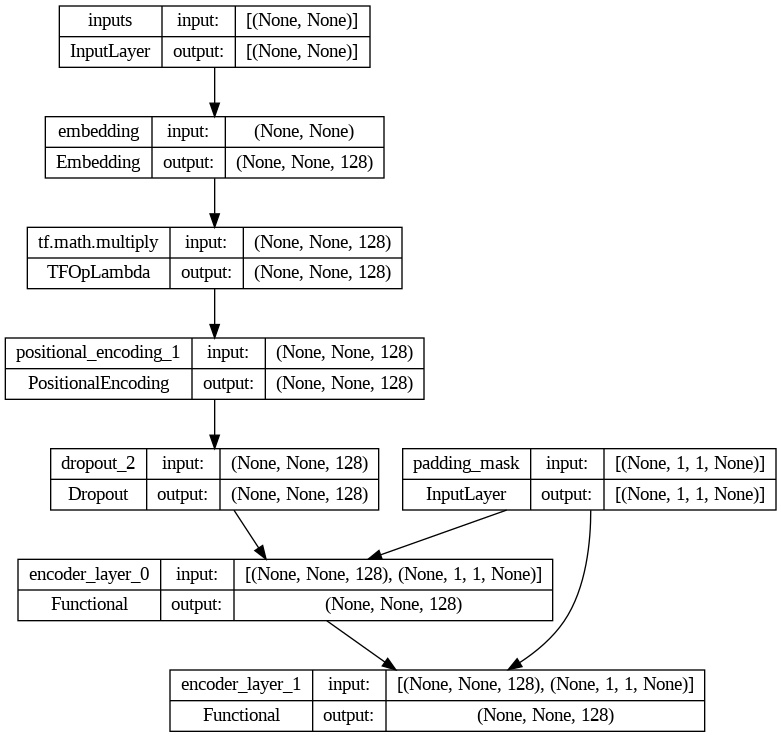

In [21]:
sample_encoder = encoder(vocab_size = 8192,
                         num_layers = 2,
                         units = 512,
                         d_model = 128,
                         num_heads = 4,
                         dropout = 0.3,
                         name = "sample_encounter")

tf.keras.utils.plot_model(sample_encoder, to_file='encoder.png', show_shapes = True)

## Decoder Layer
Each decoder layer consists of sublayers:
1. Masked multi-head attention (with look ahead mask and padding mask)
2. Multi-head attention (with padding mask). `value` and `key` receive the encoder output as inputs. `query` receives the output from the masked multi-head attention sublayer.
3. 2 dense layers followed by dropout

Each of these sublayers has a residual connection around it followed by a layer normalization. The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis.

As `query` receives the output from decoder's first attention block, and `key` receives the encoder output, the attention weights represent the important given to the decoder's input based on the encoder's output. In other words, the decoder predicts the next word by looking at the encoder output and self-attending to its own output.

In [22]:
def decoder_layer(units, d_model, num_heads, dropout, name = "decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name = 'inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name = "look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name = "padding_mask")

    attention1 = MultiHeadAttention(d_model, num_heads, name="attention_1")(inputs={'query':inputs,
                                                                                    'key': inputs,
                                                                                    'value': inputs,
                                                                                    'mask':look_ahead_mask})
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)

    attention2 = MultiHeadAttention(d_model, num_heads, name = "attention_2")(inputs={'query':attention1,
                                                                                      'key':enc_outputs,
                                                                                      'value':enc_outputs,
                                                                                      'mask':padding_mask})
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)(attention2 + attention1)

    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
                          outputs = outputs,
                          name = name)

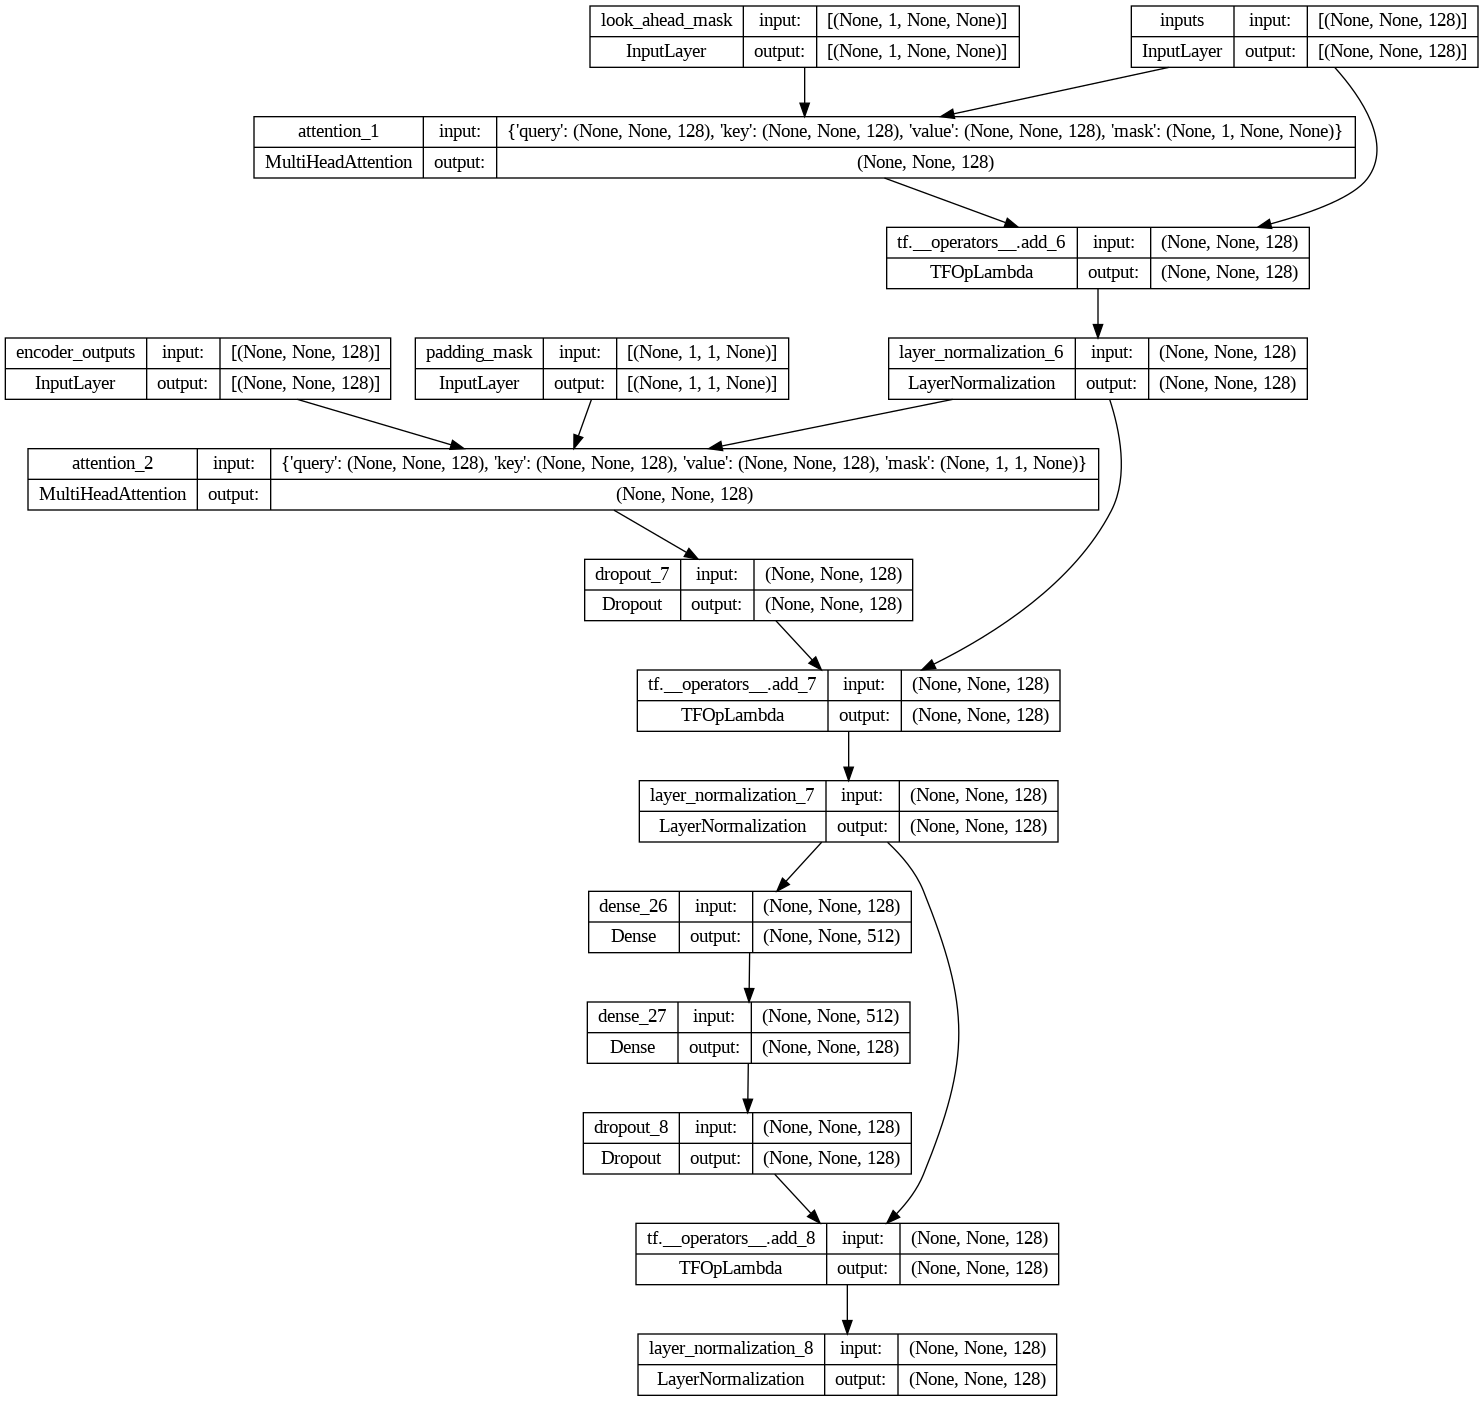

In [23]:
sample_decoder_layer = decoder_layer(units = 512,
                                     d_model = 128,
                                     num_heads = 4,
                                     dropout = 0.3,
                                     name = "sample_decoder_layer")
tf.keras.utils.plot_model(sample_decoder_layer, to_file='decoder_layer.png', show_shapes=True)

## Decoder
The decoder consists of:
1. Output embedding
2. Positional Encoding
3. N decoder layers

The target is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the decoder layers. The output of the decoder is the input to the final linear layer.

In [24]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(units = units,
                                d_model = d_model,
                                num_heads = num_heads,
                                dropout = dropout,
                                name = 'decoder_layer_{}'.format(i),)(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

        return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
                              outputs = outputs,
                              name = name)

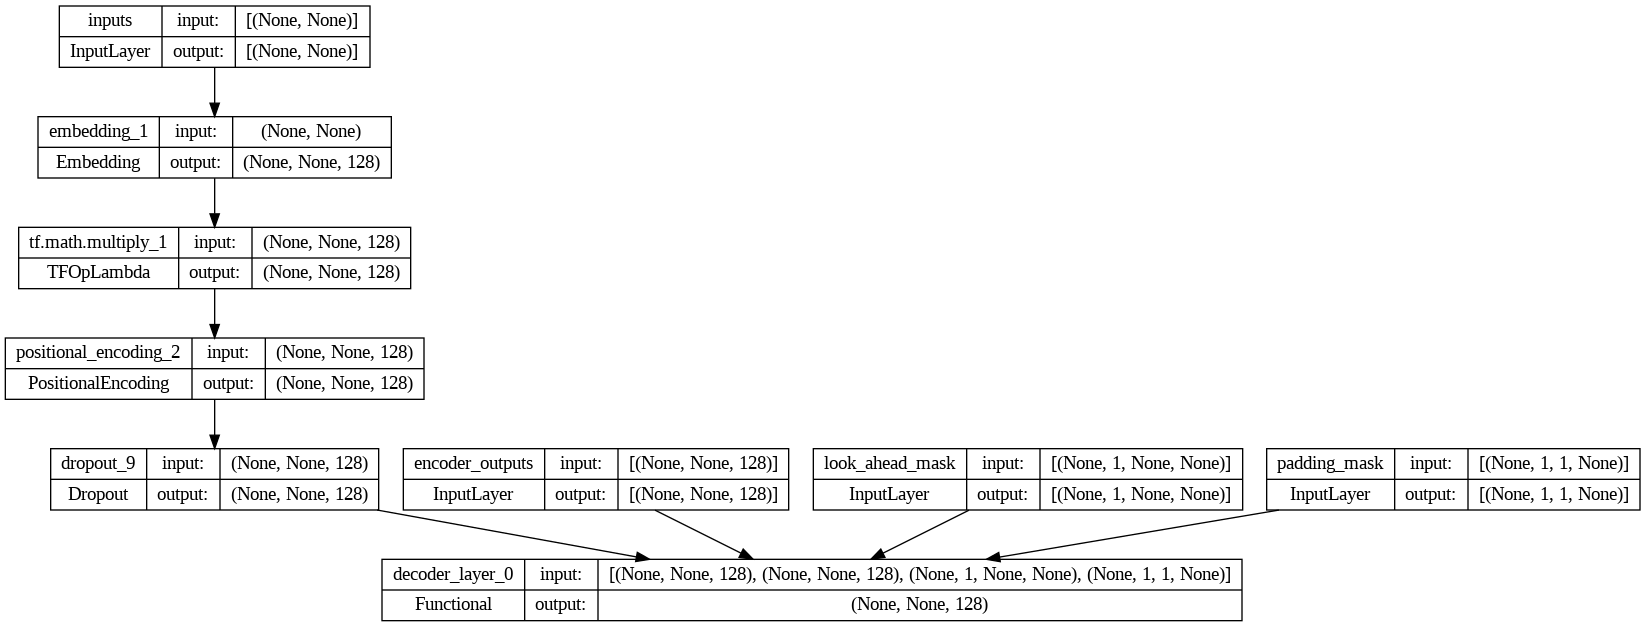

In [25]:
sample_decoder = decoder(vocab_size=8192,
                         num_layers=2,
                         units = 512,
                         d_model = 128,
                         num_heads = 4,
                         dropout = 0.3,
                         name = "sample_decoder")
tf.keras.utils.plot_model(sample_decoder, to_file='decoder.png', show_shapes = True)

## Transformer

Transformer consits of the encoder, decoder and a final linear layer. The output of the decoder is the input to the linear layer and its output is returned.

In [26]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    enc_padding_mask = tf.keras.layers.Lambda(
    create_padding_mask, output_shape=(1, 1, None),
    name="enc_padding_mask")(inputs)
    # mask the future tokens for decoder inputs at the 1st attention block
    look_ahead_mask = tf.keras.layers.Lambda(create_look_ahead_mask,
                                             output_shape=(1, None, None),
                                             name = "look_ahead_mask")(dec_inputs)
    # mask the encoder outputs for the 2nd attention block
    dec_padding_mask = tf.keras.layers.Lambda(create_padding_mask,
                                              output_shape=(1, 1, None),
                                              name="dec_padding_mask")(inputs)

    enc_outputs = encoder(vocab_size=vocab_size,
                          num_layers= num_layers,
                          units=units,
                          d_model = d_model,
                          num_heads = num_heads,
                          dropout = dropout,)(inputs = [inputs, enc_padding_mask])

    dec_outputs = decoder(vocab_size=vocab_size,
                          num_layers=num_layers,
                          units=units,
                          d_model=d_model,
                          num_heads = num_heads,
                          dropout=dropout,)(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

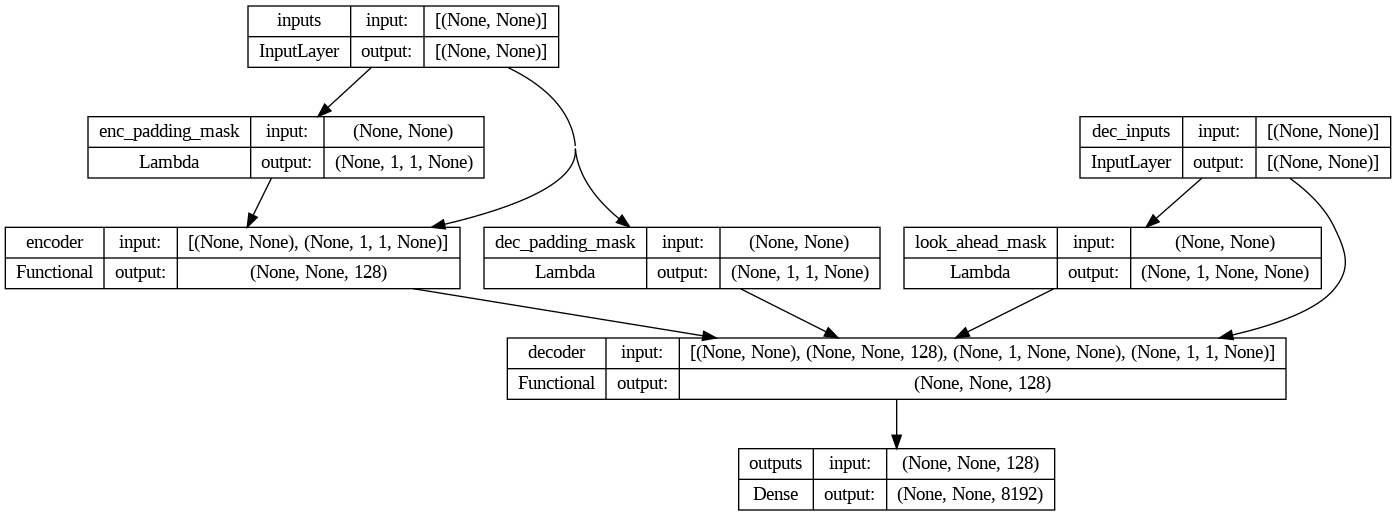

In [27]:
sample_transformer = transformer(vocab_size=8192,
                                 num_layers=4,
                                 units=512,
                                 d_model=128,
                                 num_heads = 4,
                                 dropout=0.3,
                                 name="sample_transformer")

tf.keras.utils.plot_model(sample_transformer, to_file="transformer.png", show_shapes=True)

# Train model
## Initial model
To keep this example small and relatively fast, the values for *num_layers, d_model, and units* have been reduced.

In [28]:
tf.keras.backend.clear_session()

# Hyper-parameters
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

model = transformer(
                    vocab_size = VOCAB_SIZE,
                    num_layers=NUM_LAYERS,
                    units = UNITS,
                    d_model = D_MODEL,
                    num_heads = NUM_HEADS,
                    dropout = DROPOUT)

## Loss function
Since the target sequences are padded, it is important to apply a padding mask when calculating the loss.

In [29]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits= True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

## Custom learning rate
Use the Adam optimizer with a custom learning rate scheduler according to the formula:
$$l_{rate}=d^{-0.5}_{model}*min(step\_num^{-0.5}, step\_num * warmup\_steps^{-1.5})$$

In [30]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

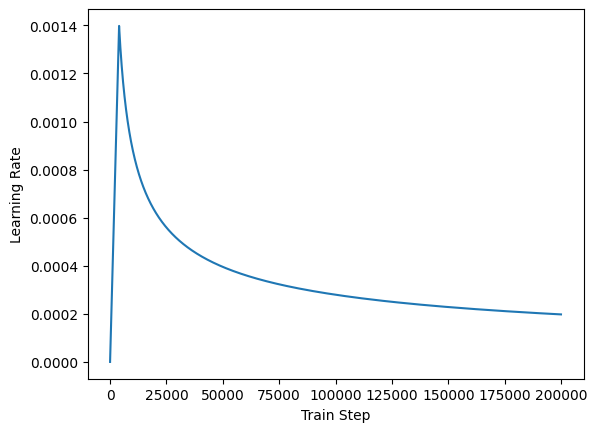

In [31]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## Compile Model


In [32]:
learning_rate = CustomSchedule(D_MODEL)

# optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
optimizer = tf.keras.optimizers.Adam(0.0001, beta_1=0.9, beta_2=0.98, epsilon=1e-9)



def accuracy(y_true, y_pred):
    # ensure labels have shape (batch_size, MAX_LENGTH - 1)
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

## Fit Model
Train our transformer by simply calling `model.fit()`

In [33]:
EPOCHS = 20

model.fit(dataset, epochs = EPOCHS)

Epoch 1/20
689/689 [==============================] - 78s 84ms/step - loss: 1.8362 - accuracy: 0.0560
Epoch 2/20
689/689 [==============================] - 36s 52ms/step - loss: 1.5121 - accuracy: 0.0779
Epoch 3/20
689/689 [==============================] - 35s 51ms/step - loss: 1.4485 - accuracy: 0.0822
Epoch 4/20
689/689 [==============================] - 33s 48ms/step - loss: 1.4084 - accuracy: 0.0848
Epoch 5/20
689/689 [==============================] - 33s 48ms/step - loss: 1.3774 - accuracy: 0.0869
Epoch 6/20
689/689 [==============================] - 34s 49ms/step - loss: 1.3511 - accuracy: 0.0889
Epoch 7/20
689/689 [==============================] - 33s 48ms/step - loss: 1.3272 - accuracy: 0.0910
Epoch 8/20
689/689 [==============================] - 33s 47ms/step - loss: 1.3055 - accuracy: 0.0931
Epoch 9/20
689/689 [==============================] - 33s 48ms/step - loss: 1.2850 - accuracy: 0.0951
Epoch 10/20
689/689 [==============================] - 33s 47ms/step - loss: 1.264

# Evaluate and predict
The following steps are used for evaluating:
* Apply the same preprocessing method we used to create our dataset for the input sentence.
* Tokenize the input sentence and add `START_TOKEN` and `END_TOKEN`.
* Calculate the padding masks and the look ahead masks.
* The decoder then outputs the predictions by looking at the encoder output and its own output.
* Select the last word and calculate the argmax of that.
* Concatenate the predicted word to the decoder input as pass it to the decoder.
* In this approach, the decoder predicts the next word based on the previous words it predicted.


In [38]:
def evaluate(sentence):
    sentence = preprocess_sentence(sentence)

    sentence = tf.expand_dims(START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis = 0)

    output = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH):
        predictions = model(inputs = [sentence, output], training = False)

        # select the last word from the seq_len dimension
        predictions = predictions[:, -1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # return the result if the predicted_id is equal to the end token
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # concatenated the predicted_id to the output which is given to the decoder at its input.
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis = 0)

def predict(sentence):
    prediction = evaluate(sentence)

    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])

    print('Input: {}'.format(sentence))
    print('Output: {}'.format(predicted_sentence))

    return predicted_sentence

In [39]:
output = predict('Where have you been?')

Input: Where have you been?
Output: i m going to get a couple of hours .


In [40]:
output = predict("It's a trap")

Input: It's a trap
Output: i don t know . i m not going to do that .


In [41]:
output = predict("What is your name?")

Input: What is your name?
Output: i don t know .
